# <center>Krystian Kierklo 162430 grupa 2 </center>
# <center>Projekt KNN </center>

Nowy punkt należy do klasy:  kwadraty


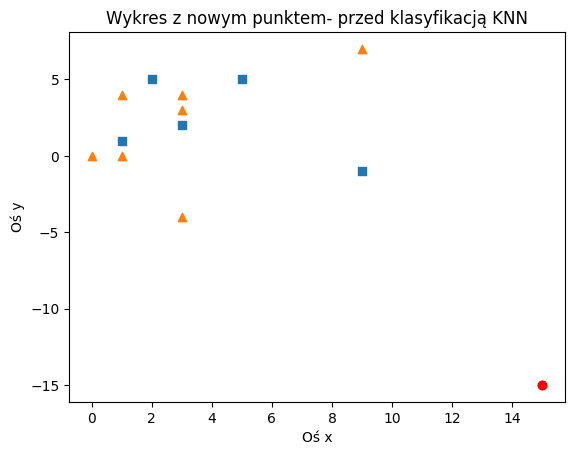

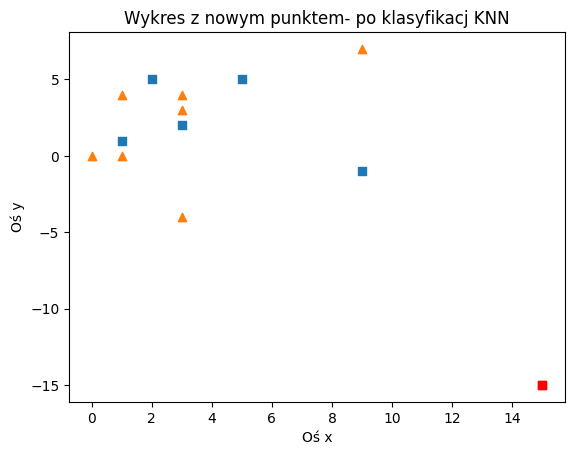

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def najczestszy_element(lista):
    licznik = {}
    for x in lista:
        if x in licznik:
            licznik[x] += 1
        else:
            licznik[x] = 1

    najczestszy = None
    najczestsza_liczba = 0
    for element, liczba in licznik.items():
        if liczba > najczestsza_liczba:
            najczestszy = element
            najczestsza_liczba = liczba

    return najczestszy



def odleglosc_euklidesowa(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))



class KNN:
    def __init__(self, k):
        self.k = k
        self.punkt = None

    def dopasuj(self, punkty):
        self.punkty = punkty

    def przewidywanie(self, nowy):
        odleglosci = []

        for x in self.punkty:
            for punkt in self.punkty[x]:
                odleglosc = odleglosc_euklidesowa(punkt, nowy)
                odleglosci.append([odleglosc, x])

        wyniki = [y[1] for y in sorted(odleglosci)[:self.k]]
        return najczestszy_element(wyniki)




zbior = {"kwadraty": [[1, 1], [2, 5], [3, 2], [9, -1], [5, 5]],
         "trojkaty": [[1, 4], [9, 7], [1, 0], [3, -4], [0, 0], [3, 3], [3, 4]]}

nowy_punkt = [15, -15]



klasyfikator = KNN(k=1)

klasyfikator.dopasuj(zbior)

print(f'Nowy punkt należy do klasy: ', klasyfikator.przewidywanie(nowy_punkt))




fig, ax = plt.subplots()

for typ_figur, lista_punktow in zbior.items():
    x = [punkt[0] for punkt in lista_punktow]
    y = [punkt[1] for punkt in lista_punktow]
    if typ_figur == "kwadraty":
        ax.scatter(x, y, label=typ_figur, marker="s")
    elif typ_figur == "trojkaty":
        ax.scatter(x, y, label=typ_figur, marker="^")

    ax.scatter(nowy_punkt[0], nowy_punkt[1], label=typ_figur, c='r')


ax.set_title("Wykres z nowym punktem- przed klasyfikacją KNN")
ax.set_xlabel("Oś x")
ax.set_ylabel("Oś y")
plt.show()


fig, ax = plt.subplots()

for typ_figur, lista_punktow in zbior.items():
    x = [punkt[0] for punkt in lista_punktow]
    y = [punkt[1] for punkt in lista_punktow]
    if typ_figur == "kwadraty":
        ax.scatter(x, y, label=typ_figur, marker="s")
    elif typ_figur == "trojkaty":
        ax.scatter(x, y, label=typ_figur, marker="^")

    if klasyfikator.przewidywanie(nowy_punkt) == "kwadraty":
        ax.scatter(nowy_punkt[0], nowy_punkt[1], label=typ_figur, marker="s", c='r')
    else:
        ax.scatter(nowy_punkt[0], nowy_punkt[1], label=typ_figur, marker="^", c='r')

ax.set_title("Wykres z nowym punktem- po klasyfikacj KNN")
ax.set_xlabel("Oś x")
ax.set_ylabel("Oś y")
plt.show()
